# Thema zur Bearbeitung des Assignment im Modul AUT62

## Titel : Neuronale Netze zur Bilderkennung

### Aufgabenstellung

Erstellen Sie ein CNN (Convolutional Neural Network) mit Python und Keras (basierend auf 
Tensorflow 2.0) zur Bildklassifizierung des CIFAR100 Datensatzes
(https://www.cs.toronto.edu/~kriz/cifar.html). Der Datensatz ist integriert in Tensorflow und 
kann mit folgendem Befehl geladen werden:
(train_data, train_labels), (test_data, test_labels) = cifar100.load_data(label_mode='fine')

Die Bilder zeigen verschiedene Objekte wie in folgender Darstellung:

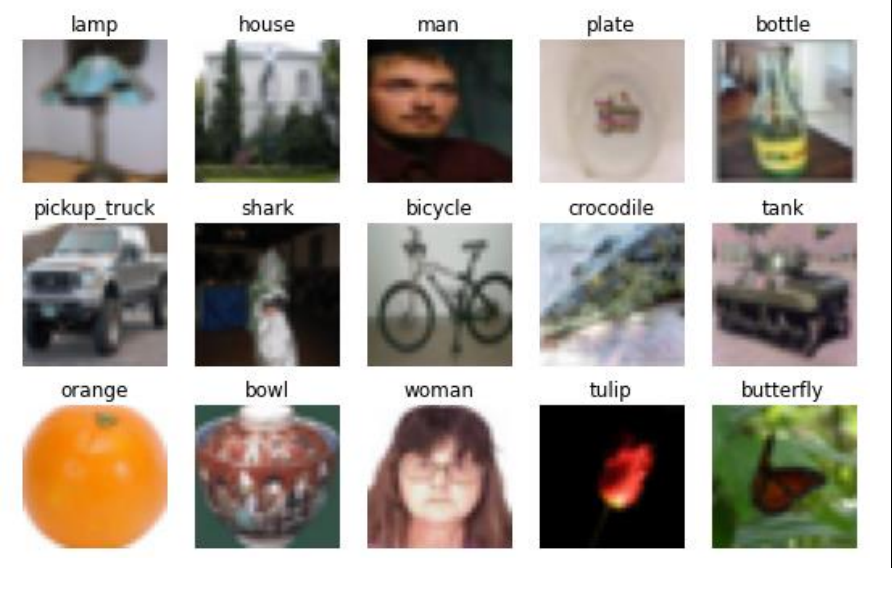

### Aufgabe 1) 
Erstellen Sie ein Grid unter Benutzung der Bibliothek matplotlib, welches zufällig 5 Bilder 
waagerecht und 3 Bilder senkrecht aus dem Datensatz anzeigt und zentriert darüber das 
entsprechende Klassenlabel.

In [5]:
### Importieren der Notwendigen Module


import tensorflow as tf
#import tensorflow_datasets as tfds
from keras.datasets import cifar100
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib import gridspec


In [6]:
### Laden und Splitten des cifar100 Datensatzes
(train_data, train_labels), (test_data, test_labels) =cifar100.load_data(label_mode='fine')
all_data =cifar100.load_data(label_mode='fine')

In [7]:
### Zusätzliches laden der Metadaten für die Labelnamen

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo)
    return dict
meta_data= unpickle("./CIFAR100/meta")


In [8]:
### Zusammenlegen aller Trainings und Testdaten und Labels (Reihenfolge bleibt erhalten)
## damit es 5 Zufällige Bilder aus dem gesamten Datensatz sind

#all_data
images =np.concatenate([train_data, test_data])
labels =np.concatenate([train_labels, test_labels])

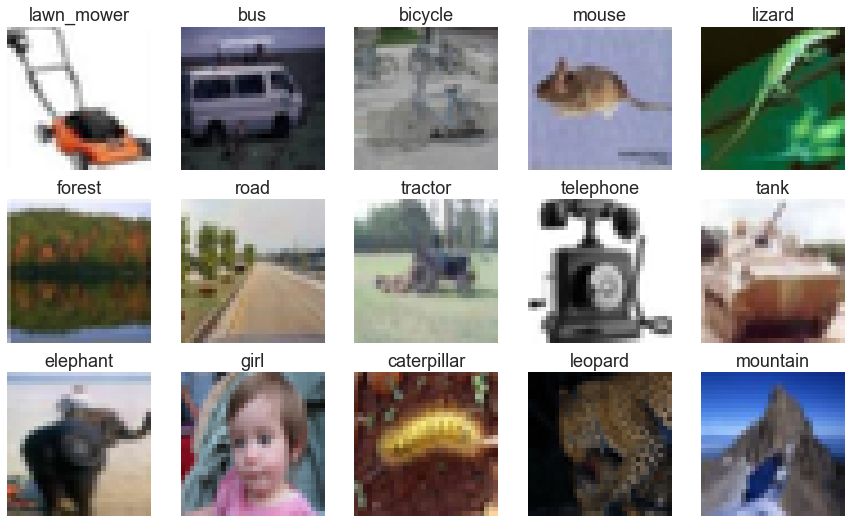

In [9]:
### Erstellung eines Grids 5 x 3 ( zufällige Bilderauswahl)

## Labelnamen der Bilder aus deme Metadaten
label_names = meta_data['fine_label_names']



## Festlegen von Zeilen und Spalten für das Bildraster , 3 Zeilen (senkrecht) zu je 5 Spalten (Waagerecht)
rows, cols = 3, 5
## Wählen von 3*5, also 15 zufälligen image index ids  , np.random.seed kann genutzt werden um das Ergebnis reproduzierbar zu machen
np.random.seed(0)
imageId = np.random.randint(0, len(images), rows * cols)
## Auswahl der Bilder anhand der zufällig gewählten indizes
images_picket = images[imageId]
## Aus den Labels datensatz werden die entsprechenden Labels anhand der ermittelten Indizes ebenfalls gewählt
labels_picket = labels[imageId]
## Definieren der Graphbox (figure) zur Einbettung des Bildes 
fig=plt.figure(figsize=(15.03, 9))  #  Faktor 5/3 (1.67) zwischen Breite und Höhe müssen beibehalten werden, 
                                    # damit die Abstände der Bilder in Beide Richtungen geleich bleiben


## Darstellung der zufällig gewählten Bilder 
gs = gridspec.GridSpec(rows, cols, wspace=0.2, hspace=0.2) # Definition des Gridlayouts für flexiblere Gestaltung
imId = 0
for i in range(rows):
    for j in range(cols):
        
        ax= plt.subplot(gs[i,j])       # Gridlayout anwenden auf die entsprechende Zelle
        ax.imshow(images_picket[imId]) # Bild aus dem angelegten Array holen
        ax.axis('off')                 # Achsenbeschriftungen und Ticks ausschalten
        
        # Labels aus den Metadaten die zusätzlich geladen wurden als Titel der Bilder darüber darstellen
        ax.set_title("{}"
#                         .format(labels[i-1].item())) # optional nur die Labelnummern
                         .format(label_names[labels_picket[imId].item()]), fontsize=18) #
        imId=imId+1      #Index für das Bild hochzählen

plt.show()


### Aufgabe 2)

Erstellen Sie ein CNN mit Keras welches mindestens drei versteckte Schichten hat, 
MaxPooling und Conv2D Layer benutzt, um die 100 Klassen des Datensatzes zu klassifizieren.
Nutzen Sie als Optimierer „Adam“ und als Bestrafungsfunktion (Loss-Function)
„sparse_categorial_crossentropy“. Beschreiben Sie, warum Sie die Architektur so gewählt 
haben, wie Sie diese gewählt haben

###### Strukturwahl
Basis der Recherche für die Strukturwahl ist das Buch Neuronale Netze programmieren mit_Python 2. Auflage 2020, Rheinwerkverlag, J. Steinwendner, R. Schwaiger, S. 197-218) sowie https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

Die Gewählte Struktur ist in Abbildung 1. dargestellt.

Der sog. __Kodierungsblock__ besteht aus 3 Convolution Layer die jeweils aus einer __Convolutional-2D__ und einem __Maxpooling-operation__ gebildet werden. Hierbei steigt mit jedem Convolution Layer die Anzahl der Parameter  und damit die Komplexität der extrahierten Merkmale. Im ersten Convolutional Layer  wird die Filteranzahl (Features) mit 32  gewählt, die dann auf 64 verdoppelt wird und zuletzt auf 128 (abermalige Verdopplung) gestetzt wird. Für die Fenstergröße der Filter wird eine 3x3 Matrix gewählt (Kernel size), da sich diese nach Internetrecherche für die gewählte Größe des Bildes und der Conv2D Layer als bevorzugt herausstellt . Gängig wären auch 2x2 oder 5x5 oder 7x7. 
Die Idee Struktur ist, dass zunächst einfache Merkmale, wie Kanten extrahiert werden, dann Kombinationen von Kanten und dann komplexerer Kombinationen zur Klassifizierung zur Verfügung stehen.

Mit der Standardmäßigen __Schrittweite__ von (1,1) wird das Fenster der bei der Faltung immer um eine Zeile bzw Spalte verschoben. Da das Eingabe Bild mit 32x32 nicht sehr groß ist, sollte die Schrittweite nicht größer sein.

Damit auch Kanten/ Features im Randbereich berücksichtig werden wird der __Padding__ auf "same" eingestellt. Dadurch wird die Feature Map genauso groß, wie die Input Feature Map bzw Bild, weil der Input Künstlich vergrößert wird, damit das Fenster über den Rand wandern kann.

Als __Aktivierungsfunktion__ wird die "relu"-Funktion (rectified linear units) genommen. Diese ist eine bewährte Aktivierungsfunktion bei CNNs und wird für den Anfang empfohlen.Der Parameter "input_shape" wird von den eingelesenen Bildern bestimmt (32 x 32 Pixel und 3 Farbkanäle (RGB)).

Das __Maxpooling__ folgt immer nach einer Faltung. "*Ziel des Poolings ist eine Reduktion der Dimensionalität*" und erhöht die Flexibilität  beim Erkennen der Merkmale. Diese können z. B. in einem gewissen Maß verschoben sein. Das Maxpoolingfenster wird 2x2 gewählt, ebenfalls ein bewährter Wert bei den gewählten Fenstergrößen der für die Faltungen.
Beim Maxpooling wird immer der höchste Wert aus dem 2x2 Fensterausschnitt übernommen. Hierdurch werden die Feature Maps der Faltungin beiden Dimensionen halbiert.

Um den Kodierungsblock abzuschließen wird der Flattenlayer hinzugefügt. Dieser sorgt dafür das der Mehrdimensionale Output aus den den vorherigen Schicht in ein eindimensionalen Vektor transformiert wird (hier 128x2x2 zu 512x1). Dieser Vorgang heißt auch "Flattening" und liefert den Inputvektor für den Klassifizierungs- bzw. Prädiktionisblock.

Der __Prädiktionsblock__ besteht aus "Dense-Layern" mit vollständig miteinander verbundenen Knoten und leistet die eigentliche Klassifizierung. Der erste Dense Layer bekommt 128 Knoten (willkührlich gewählt). Diesem folgt ein  weiterer und letzter Dense-Layer, welcher die Ausgabeschicht darstellt und entsprechend der 100 zu identifizierenden Klassen 100 Knoten bekommt.

Die Aktivierungsfunktion wird bei dem 1. Dense-Layer auf "relu" belassen bein finalen Layer wird "softmax" genommen, um die finalen Resultate in Form von Wahrscheinlichkeitswerte zu bringen (Werte zwischen 1 und 0).


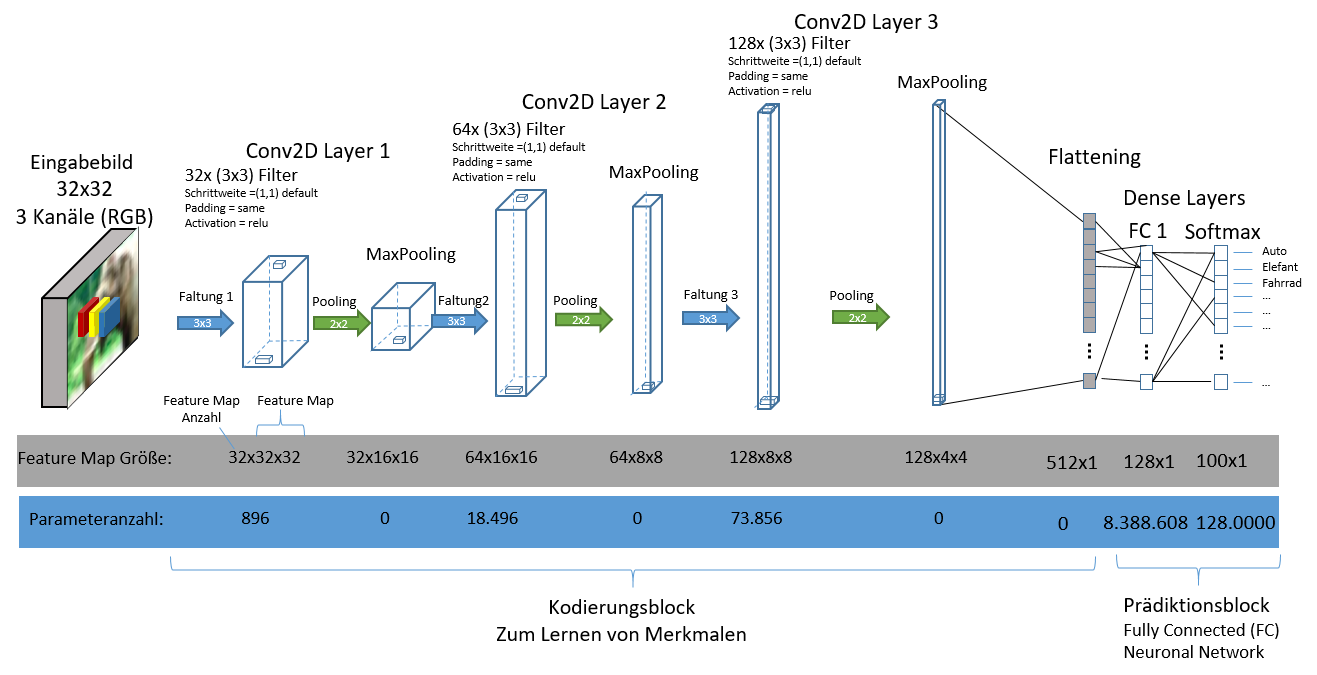

(Abbildung1: Vorgeschlagene CNN Basis-Struktur Eigene Darstellung)


#### Die Größe der Feature Map durch Faltung lässt sich bei Symmetrischen Bildern/Feature Maps wie folgt berechen


Durch MaxPooling mit einem 2x2 Fenster werden die Featuremaps in Höhe und Breite halbiert und aus einer 32x32 Featuremap wird eine 16x16 Feature Map. (erstes Pooling)



#### Parameteranzahl berechnet sich über die Formel:

(Filterbreite x Filterhöhe x Anzahl Filter der vorherigen Schicht +1) * Anzahl der Filter (((3x3x3)+1)x32) = 896.
die Anzahl der Filter beim Eingabebild entspricht der Anzahl der Farbkanäle (also 3)

Vergleiche:
https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d




#### Die Struktur in Code-Form

In [6]:
## CNN (Aufgabe 2 - Import statements)
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten


In [7]:
## CNN (Aufgabe 2 - Struktur)
model = Sequential()

## Kodierungsblock Convollutioinal und Pooling layer
## Convolutioin Block 1
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same", input_shape=(32, 32, 3))) ## Erkennen einzelner Kanten
model.add(MaxPooling2D(pool_size=(2, 2)))
## Convolutioin Block 2
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")) ## Erkennen Kombinierter Kanten (Merkmale)
model.add(MaxPooling2D(pool_size=(2, 2)))
## Convolutioin Block 3
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same")) ## Erkennen weiterer Kombinationen von zusammengesetzen Kanten
model.add(MaxPooling2D(pool_size=(2, 2)))


#model.add(Flatten())

## Prädiktionsblock
model.add(Dense(128, activation="relu"))
model.add(Dense(100, activation="softmax"))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])


### Aufgabe 3)

Trainieren Sie ihr CNN. Nutzen Sie 20% des Trainingsdatensatzes als Validierungsdaten.
Trainieren Sie das Netz mindestens für 50 Epochen. Erreichen Sie eine Genauigkeit von 
mindestens 34% auf dem Validierungsdatensatz. Erstellen Sie eine Grafik, die die Genauigkeit 
bezgl. der Validierungsdaten über die Epochen, darstellt:

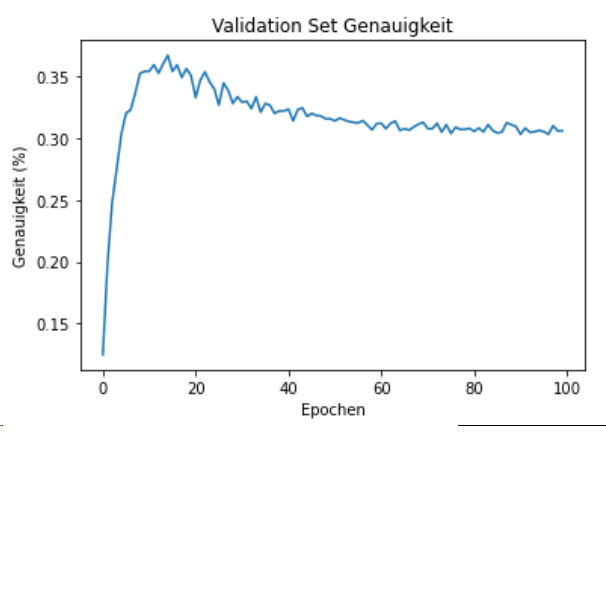
(Abbildung 1: Beispiel Genauigkeitskurve aus der Aufgabenstellung)

In [8]:
### Importieren der Notwendigen Module
import tensorflow as tf
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D, Flatten
from tensorflow.python.client import device_lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [9]:


### Laden und Splitten des cifar100 Datensatzes
(X_train, y_train), (X_test, y_test) =cifar100.load_data(label_mode='fine')



In [10]:
X_train.shape # Schauen welches Format die Daten haben -> 50000 Bilder , mit 32x32 Pixel, 3 Kanäle rgb

(50000, 32, 32, 3)

In [11]:
#X_train[0] # schauen welche Werte eine Matrix enthält -> werte von 0 - 255 
           # -> müssen am besten zwischene 0 und 1 gebracht werden damit es besser verarbeitet werden kann
           # alles durch 255 Teilen
X_train_n=X_train.astype(np.float32)/255.
X_test_n=X_test.astype(np.float32)/255. # gleich für Testdaten auch normalisieren
#X_train_n[0] # prüfen -> passt

In [12]:
tf.config.list_physical_devices('GPU') # Habe die Tensorflow GPU-Unterstützung implementiert dann geht es schneller 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [13]:
# Aufgabe 3  - Training des Models mit der Struktur aus Aufgabe 2


model1 = Sequential()

## Kodierungsblock Convollutioinal und Pooling layer

## Convolutioin Block 1
model1.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3))) ## Erkennen z. B. von einzelner Kanten
model1.add(MaxPooling2D(pool_size=(2, 2)))
## Convolutioin Block 2
model1.add(Conv2D(64, kernel_size=(3, 3), activation="relu")) ## Erkennen Kombinierter Kanten / Features
model1.add(MaxPooling2D(pool_size=(2, 2)))
## Convolutioin Block 3
model1.add(Conv2D(128, kernel_size=(3, 3), activation="relu")) ## Erkennen weiterer Kombinationen von zusammengesetzen Features
model1.add(MaxPooling2D(pool_size=(2, 2)))
#Flattening Layer
model1.add(Flatten())

## Prädiktionsblock
model1.add(Dense(128, activation="relu"))
model1.add(Dense(100, activation="softmax"))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history=model1.fit(                          # Returnwert des model fift ist ein dictionary mit Genauigkeitsmetriken
   X_train_n.reshape(50000, 32, 32, 3),
   y_train,
   epochs=100,
   batch_size=100,          # 100 gewählt um einen steilen Anstieg der Genauigkeit zu bekommen (Abbildung 1)
   validation_split=0.2)

Epoch 1/100
400/400 [==============================] - 5s 8ms/step - loss: 4.1152 - accuracy: 0.0702 - val_loss: 3.7136 - val_accuracy: 0.1328
Epoch 2/100
400/400 [==============================] - 3s 7ms/step - loss: 3.5165 - accuracy: 0.1665 - val_loss: 3.4110 - val_accuracy: 0.1829
Epoch 3/100
400/400 [==============================] - 3s 7ms/step - loss: 3.1891 - accuracy: 0.2240 - val_loss: 3.1872 - val_accuracy: 0.2281
Epoch 4/100
400/400 [==============================] - 3s 7ms/step - loss: 2.9859 - accuracy: 0.2666 - val_loss: 3.0099 - val_accuracy: 0.2638
Epoch 5/100
400/400 [==============================] - 3s 7ms/step - loss: 2.8248 - accuracy: 0.2964 - val_loss: 2.9069 - val_accuracy: 0.2878
Epoch 6/100
400/400 [==============================] - 3s 7ms/step - loss: 2.6823 - accuracy: 0.3247 - val_loss: 2.8230 - val_accuracy: 0.2979
Epoch 7/100
400/400 [==============================] - 3s 7ms/step - loss: 2.5694 - accuracy: 0.3481 - val_loss: 2.7428 - val_accuracy: 0.3233

Epoch 58/100
400/400 [==============================] - 3s 7ms/step - loss: 0.7701 - accuracy: 0.7655 - val_loss: 4.2952 - val_accuracy: 0.3457
Epoch 59/100
400/400 [==============================] - 3s 7ms/step - loss: 0.7414 - accuracy: 0.7744 - val_loss: 4.4318 - val_accuracy: 0.3421
Epoch 60/100
400/400 [==============================] - 3s 7ms/step - loss: 0.7438 - accuracy: 0.7693 - val_loss: 4.4460 - val_accuracy: 0.3406
Epoch 61/100
400/400 [==============================] - 3s 7ms/step - loss: 0.7218 - accuracy: 0.7788 - val_loss: 4.4677 - val_accuracy: 0.3398
Epoch 62/100
400/400 [==============================] - 3s 7ms/step - loss: 0.7100 - accuracy: 0.7812 - val_loss: 4.6084 - val_accuracy: 0.3477
Epoch 63/100
400/400 [==============================] - 3s 8ms/step - loss: 0.6963 - accuracy: 0.7860 - val_loss: 4.6308 - val_accuracy: 0.3365
Epoch 64/100
400/400 [==============================] - 3s 7ms/step - loss: 0.6879 - accuracy: 0.7882 - val_loss: 4.7682 - val_accuracy:

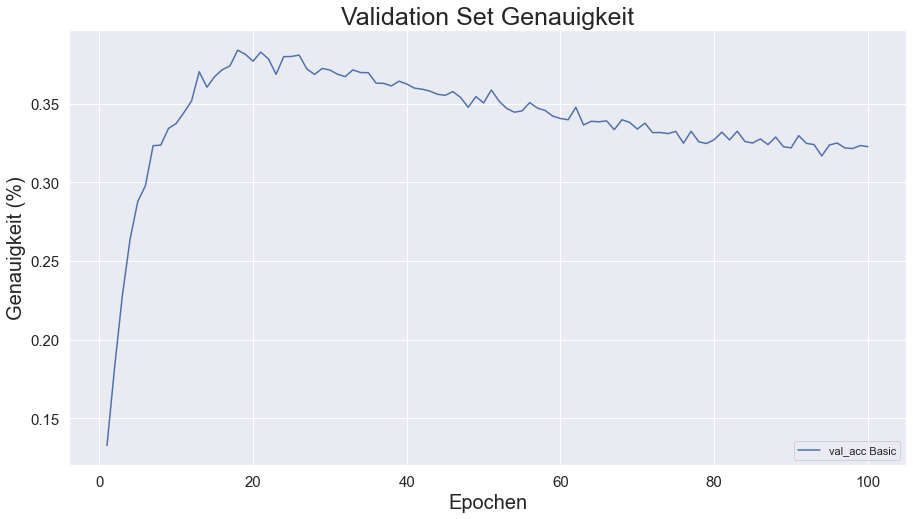

In [16]:
## Grafik, die die Genauigkeit bezgl. der Validierungsdaten über die Epochen, darstellt:

val_accuracy1 = history.history['val_accuracy'] ## Werte aus dem angelegten Dictionary für die Validations Genauigkeit
#train_accuracy = history.history['accuracy'] ## Werte aus dem angelegten Dictionary für die Trainingsgenauigkeit

epochs = range(1, len(val_accuracy1) + 1) ## Anlegen entsprechendes Epochen-Array mit gleicher Form wie val_accuracy

fig, ax = plt.subplots(figsize=(15,8)) # Anlegen der Grafikbox

plt.plot(epochs,val_accuracy1,label= "val_acc Basic")           # Eintragen der Kurve ( x-, y-Werte) Validationsgenauigkeit
#plt.plot(epochs,train_accuracy,label= "train_acc Basic")           # Trainingsgenauigkeit
plt.title("Validation Set Genauigkeit", fontsize=25, )  # Titel der Grafik und Schriftgröße
plt.xlabel("Epochen", fontsize=20)                      # x-Achsentitel und dessen Schriftgröße
plt.ylabel("Genauigkeit (%)", fontsize=20)              # y-Achsentitel und dessen Schriftgröße
plt.xticks(fontsize = 15)                               # x-Achsenskala  Schriftgröße
plt.yticks(fontsize = 15)                               # y-Achsenskala  Schriftgröße
plt.legend(loc='lower right')
plt.show()

### Aufgabe 4)

Sie sollten einen ähnlichen Verlauf der Genauigkeit wie in der oberen Grafik erhalten. Was 
sagt Ihnen dieser Verlauf? Beschreiben Sie die Situation.
Beschreiben und implementieren Sie mindestens zwei verschiedene Regulierungstechniken, 
um die Genauigkeit ihres CNN weiter zu verbessern.

### Kurven Interpretation und Situationsbeschreibung

Die Genauigkeit steigt in den ersten 15  Epochen sehr steil und erreicht ihr Maximum um die Epoche 20-23 . Danach itteriert die Genauigkeit und nimmt wieder kontinuierlich ab um sich der 31% Marke zu nähern.

Das Modell kann also bereits nach etwa 23 Epochen keine weitere Verbesserung herstellen. Im Gegenteil, die Performance nimmt danach sogar ab.

Trägtt man neben der Validationsgenauigkeit auch die Trainingsgenauigkeit auf,sieht man , dass die beiden Kurven immer stärker auseinanderdriften, was typisch ist und den Effekt des Übertrainieren  wiederspiegelt, sich das Modell also den Trainingsdaten immer stärker angepasst aber weniger generalisiert. Je mehr Zeit man dem Modell gibt und je Komplexer es ist, je besser kann es sich den Trainingsdaten anpassen kann  aber gleichzeitig die Validierungsdaten immer weniger gut zuordnen.


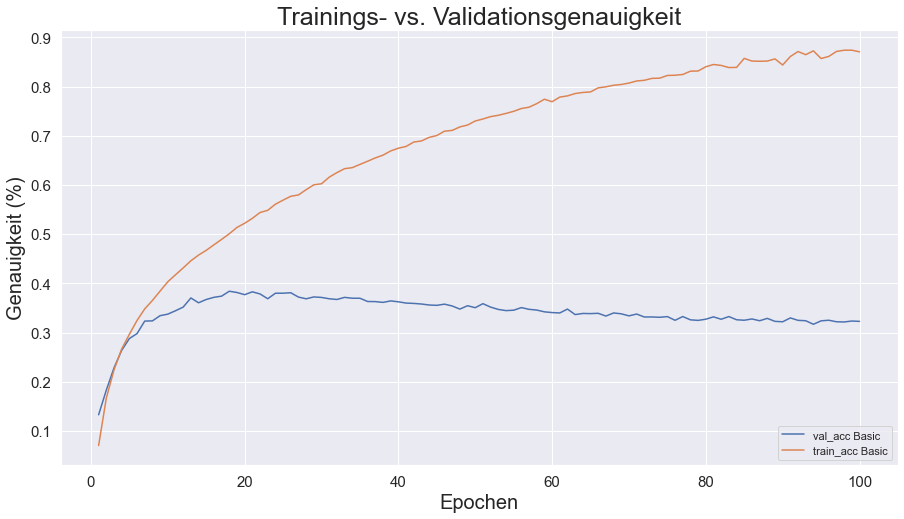

In [17]:
## Grafik, die Trainings- und Validationsgenauigkeit  über die Epochen, darstellt:

val_accuracy1 = history.history['val_accuracy'] ## Werte aus dem angelegten Dictionary für die Validations Genauigkeit
train_accuracy = history.history['accuracy'] ## Werte aus dem angelegten Dictionary für die Trainingsgenauigkeit

epochs = range(1, len(val_accuracy1) + 1) ## Anlegen entsprechendes Epochen-Array mit gleicher Form wie val_accuracy

fig, ax = plt.subplots(figsize=(15,8)) # Anlegen der Grafikbox

plt.plot(epochs,val_accuracy1,label= "val_acc Basic")           # Eintragen der Kurve ( x-, y-Werte) Validationsgenauigkeit
plt.plot(epochs,train_accuracy,label= "train_acc Basic")           # Trainingsgenauigkeit
plt.title("Trainings- vs. Validationsgenauigkeit", fontsize=25, )  # Titel der Grafik und Schriftgröße
plt.xlabel("Epochen", fontsize=20)                      # x-Achsentitel und dessen Schriftgröße
plt.ylabel("Genauigkeit (%)", fontsize=20)              # y-Achsentitel und dessen Schriftgröße
plt.xticks(fontsize = 15)                               # x-Achsenskala  Schriftgröße
plt.yticks(fontsize = 15)                               # y-Achsenskala  Schriftgröße
plt.legend(loc='lower right')
plt.show()

### Regulierungstechniken

#### Regulierungstechnik 1
Eine Möglichkeit das Modell zu verbessern, wäre die Nutzung von sog. __Dropout Layern__.
Dieser Layer oder Funktion wirkt der Überanpassung (Overfitting) entgegen indem in jedem Batch(ein bestimmter Prozentsatz, zufällig ausgewählter Knotenverbindungen deaktiviert wird.
Zunächst werden Dropouts am Ende des Faltungslayers (nach dem Pooling) eingebracht um  1/4 der Verbindungen zur nächsten Schicht zu deaktiviert (Gewichte werden da auf 0 gesetzt).


#### Regulierungstechnik 2
Weitere Verbesserungen sind möglich durch Hyperparameter Anpassungen.
So können beispielsweise die Batchgröße angepasst und die Aktivierungsfunktion und der Optitmierer geändert werden.
Die Anzahl der Knoten der Conv Layer oder und der Dense Layers angepasst werden. Auch die Batchgröße kann geändert werden.

Systematische Rastersuchen der Parameter (Grid oder Random Search) ließen sich nutzen um die Genauigkeit zu optimieren.
Dies kann sehr aufwendig und Zeitintensiv sein. 
In diesem Fall wird das manuell an ausgesuchten Parmetern gemacht und die Parameter die die besten Ergebnisse liefern beibehalten.

Batch size : 100 - 1000 

Activation: relu, elu

Optimierer: Adam, Nadam

Dropout-Parameter im Conv: (0.25, 0.33, 0.4)
Dropout-Parameter zwischen Flatten und Dense Layer (0.0, 0.4)

####  Regulierungstechnik 3
Es könnten mit auch aus den Vorhandenen Daten zusätzliche Datenerzeugt werden. Hierzu gibt es in Keras den ImageDataGenerator. Hierdurch kann während der Laufzeit zusätzliche Daten durch Verschiebungen, Zoome, Rotationen oder Spiegelungen erzeugt werden. Dies wird aber in dieser Arbeit nicht weiter verfolgt , weil ich unsicher bin, ob das in dieser Arbeit als Möglichkeit gesehen wird.



### Implementierung Regulierungstechnik 1:  Dropout Layer

In [18]:
### Importieren der Notwendigen Module
import tensorflow as tf
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.python.client import device_lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()



In [19]:
### Laden und Splitten des cifar100 Datensatzes
(X_train, y_train), (X_test, y_test) =cifar100.load_data(label_mode='fine')

In [20]:
X_train.shape # Schauen welches Format die Daten haben -> 50000 Bilder , mit 32x32 Pixel, 3 Kanäle rgb

(50000, 32, 32, 3)

In [21]:
#X_train[0] # schauen welche Werte eine Matrix enthält -> werte von 0 - 255 
           # -> müssen am besten zwischene 0 und 1 gebracht werden damit es besser verarbeitet werden kann
           # alles durch 255 Teilen
X_train_n=X_train.astype(np.float32)/255.
X_test_n=X_test.astype(np.float32)/255. # gleich für Testdaten auch normalisieren
#X_train_n[0] # prüfen -> passt

In [22]:
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [23]:
#Aufgabe 4 Regulierungstechnik 1: CNN mit Dropout Layer.)!

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten


model2 = Sequential()

## Kodierungsblock Convollutioinal und Pooling layer
## Convolutioin Block 1
model2.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same", input_shape=(32, 32, 3))) ## Erkennen einzelner Kanten
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25)) # 1/4 der Verbindungen werden Pro Batch fallen gelassen.
## Convolutioin Block 2
model2.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")) ## Erkennen Kombinierter Kanten
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25)) # 1/4 der Verbindungen werden Pro Batch fallen gelassen.
## Convolutioin Block 3
model2.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same")) ## Erkennen weiterer Kombinationen von zusammengesetzen Kanten
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25)) # 1/4 der Verbindungen werden Pro Batch fallen gelassen.
#Flattening Layer
model2.add(Flatten())

## Prädiktionsblock
model2.add(Dense(128, activation="relu"))
model2.add(Dense(100, activation="softmax"))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history=model2.fit(                          # Returnwert des model fit ist ein dictionary mit Genauigkeitsmetriken
   X_train_n.reshape(50000, 32, 32, 3),
   y_train,
   epochs=100,
   batch_size=100,
   validation_split=0.2)

Epoch 1/100
400/400 [==============================] - 4s 9ms/step - loss: 4.1399 - accuracy: 0.0669 - val_loss: 3.7934 - val_accuracy: 0.1185
Epoch 2/100
400/400 [==============================] - 3s 8ms/step - loss: 3.4961 - accuracy: 0.1699 - val_loss: 3.2659 - val_accuracy: 0.2085
Epoch 3/100
400/400 [==============================] - 3s 8ms/step - loss: 3.1475 - accuracy: 0.2317 - val_loss: 3.0136 - val_accuracy: 0.2615
Epoch 4/100
400/400 [==============================] - 3s 8ms/step - loss: 2.9096 - accuracy: 0.2776 - val_loss: 2.8406 - val_accuracy: 0.3026
Epoch 5/100
400/400 [==============================] - 3s 8ms/step - loss: 2.7550 - accuracy: 0.3061 - val_loss: 2.7513 - val_accuracy: 0.3112
Epoch 6/100
400/400 [==============================] - 3s 8ms/step - loss: 2.6090 - accuracy: 0.3365 - val_loss: 2.6143 - val_accuracy: 0.3482
Epoch 7/100
400/400 [==============================] - 3s 8ms/step - loss: 2.5033 - accuracy: 0.3616 - val_loss: 2.5952 - val_accuracy: 0.3507

Epoch 58/100
400/400 [==============================] - 3s 8ms/step - loss: 1.2426 - accuracy: 0.6388 - val_loss: 2.3851 - val_accuracy: 0.4343
Epoch 59/100
400/400 [==============================] - 3s 9ms/step - loss: 1.2382 - accuracy: 0.6357 - val_loss: 2.3335 - val_accuracy: 0.4440
Epoch 60/100
400/400 [==============================] - 3s 8ms/step - loss: 1.2209 - accuracy: 0.6405 - val_loss: 2.4027 - val_accuracy: 0.4365
Epoch 61/100
400/400 [==============================] - 3s 8ms/step - loss: 1.2264 - accuracy: 0.6377 - val_loss: 2.4396 - val_accuracy: 0.4366
Epoch 62/100
400/400 [==============================] - 3s 8ms/step - loss: 1.2140 - accuracy: 0.6410 - val_loss: 2.4308 - val_accuracy: 0.4385
Epoch 63/100
400/400 [==============================] - 3s 8ms/step - loss: 1.2054 - accuracy: 0.6442 - val_loss: 2.3732 - val_accuracy: 0.4434
Epoch 64/100
400/400 [==============================] - 3s 8ms/step - loss: 1.2070 - accuracy: 0.6423 - val_loss: 2.3821 - val_accuracy:

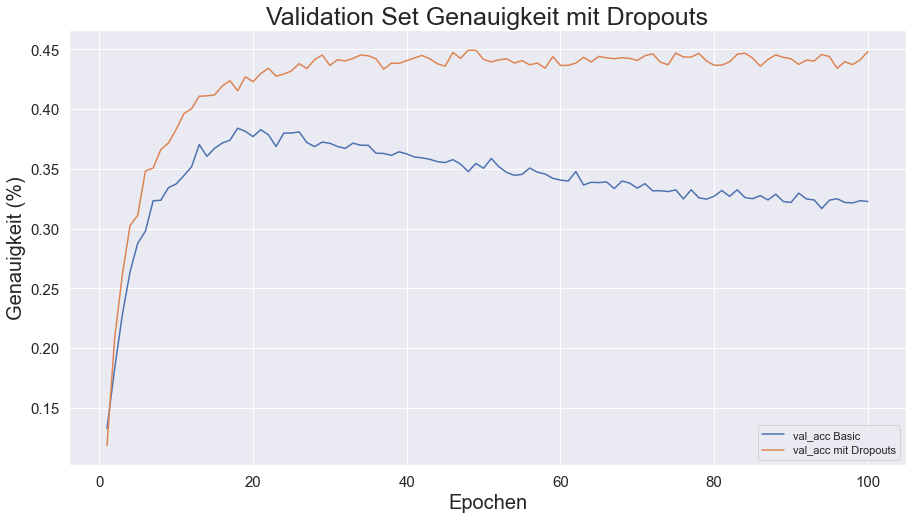

In [24]:
## Grafik, die die Genauigkeit bezgl. der Validierungsdaten über die Epochen, darstellt:

val_accuracy2 = history.history['val_accuracy'] ## Werte aus dem angelegten Dictionary für die Validations Genauigkeit
 
epochs = range(1, len(val_accuracy2) + 1) ## Anlegen entsprechendes Epochen-Array mit gleicher Form wie val_accuracy

fig, ax = plt.subplots(figsize=(15,8)) # Anlegen der Grafikbox

plt.plot(epochs,val_accuracy1,label= "val_acc Basic" )           # Eintragen der Kurve ( x-, y-Werte)
plt.plot(epochs,val_accuracy2,label= "val_acc mit Dropouts")           # Eintragen der Kurve ( x-, y-Werte)
plt.title("Validation Set Genauigkeit mit Dropouts", fontsize=25, )  # Titel der Grafik und Schriftgröße
plt.xlabel("Epochen", fontsize=20)                      # x-Achsentitel und dessen Schriftgröße
plt.ylabel("Genauigkeit (%)", fontsize=20)              # y-Achsentitel und dessen Schriftgröße
plt.xticks(fontsize = 15)                               # x-Achsenskala  Schriftgröße
plt.yticks(fontsize = 15)                               # y-Achsenskala  Schriftgröße
plt.legend(loc='lower right')
plt.show()

### Implementierung Regulierungstechnik 2 : Hyperparameter optimieren
z.B.
Wie erläutert wurden die ausgewählten Parameter in verschiedener Kombinatiton und Werten ausgetestet und die maximal erreichte Genauigkeit notiert

- Der Beste Versuch war zunächst der 9. Versuch, da es aber schien, dass die Genauigkeit sich noch bis zur letzten Epoche   verbessert hat wurde ein weiterer Versuch mit höherer Anzahl Epochen gemacht. Die Anzahl wurde verdoppelt von 100 auf 200

Die besten ermittelten Parameter waren daher in Versuch 13 

### Versuch13:
__Parameter:__

- Staffelung der Dropout-Parameter (Conv Block 1: 0.25, Conv Block 2: 0.33, Conv Block 3: 0.4) 
- Dropout zwischen Flatten und Dense Layer 0.4
- activation Conv: elu
- activation Dense: relu
- Optimierer: Nadam
- Batch size : 500
- Epochen : 200
Max val_accuracy: 0.4932   

### Versuch1:
__Parameter:__

- Staffelung der Dropout-Parameter (Conv Block 1: 0.25, Conv Block 2: 0.33, Conv Block 3: 0.4)
- activation Conv: relu
- activation Dense: relu
- Optimierer: Adam
- Batch size : 1000
- Epochen : 100
Max val_accuracy: 0.4512

### Versuch2:
__Parameter:__

- Staffelung der Dropout-Parameter (Conv Block 1: 0.25, Conv Block 2: 0.33, Conv Block 3: 0.4)
- activation Conv: elu
- activation Dense: relu
- Optimierer: Adam
- Batch size : 1000
- Epochen : 100
Max val_accuracy: 0.4615

### Versuch3:
__Parameter:__

- Staffelung der Dropout-Parameter (Conv Block 1: 0.25, Conv Block 2: 0.33, Conv Block 3: 0.4)
- activation Conv: elu
- activation Dense: relu
- Optimierer: Nadam
- Batch size : 1000
- Epochen : 100
Max val_accuracy: 0.4532

### Versuch4:
__Parameter:__

- Staffelung der Dropout-Parameter (Conv Block 1: 0.25, Conv Block 2: 0.33, Conv Block 3: 0.4)
- activation Conv: elu
- activation Dense: elu
- Optimierer: Adam
- Batch size : 1000
- Epochen : 100
Max val_accuracy: 0.4608

### Versuch5:
__Parameter:__

- Staffelung der Dropout-Parameter (Conv Block 1: 0.25, Conv Block 2: 0.33, Conv Block 3: 0.4)
- activation Conv: elu
- activation Dense: elu
- Optimierer: Adam
- Batch size : 100
- Epochen : 100
Max val_accuracy: 0.4679

### Versuch6:
__Parameter:__

- Staffelung der Dropout-Parameter (Conv Block 1: 0.25, Conv Block 2: 0.33, Conv Block 3: 0.4)
- activation Conv: elu
- activation Dense: elu
- Optimierer: Adam
- Batch size : 500
- Epochen : 100
Max val_accuracy: 0.4670

### Versuch7:
__Parameter:__

- Staffelung der Dropout-Parameter (Conv Block 1: 0.25, Conv Block 2: 0.33, Conv Block 3: 0.4)
- activation Conv: elu
- activation Dense: elu
- Optimierer: Adam
- Batch size : 300
- Epochen : 100
Max val_accuracy: 0.4641

### Versuch8:
__Parameter:__

- Staffelung der Dropout-Parameter (Conv Block 1: 0.25, Conv Block 2: 0.33, Conv Block 3: 0.4) 
- Dropout zwischen Flatten und Dense Layer 0.4
- activation Conv: elu
- activation Dense: relu
- Optimierer: Nadam
- Batch size : 300
- Epochen : 100
Max val_accuracy: 0.4763
### Versuch9:
__Parameter:__

- Staffelung der Dropout-Parameter (Conv Block 1: 0.25, Conv Block 2: 0.33, Conv Block 3: 0.4) 
- Dropout zwischen Flatten und Dense Layer 0.4
- activation Conv: elu
- activation Dense: relu
- Optimierer: Nadam
- Batch size : 500
- Epochen : 100
Max val_accuracy: 0.4825
### Versuch10:
__Parameter:__

- Staffelung der Dropout-Parameter (Conv Block 1: 0.25, Conv Block 2: 0.33, Conv Block 3: 0.4) 
- Dropout zwischen Flatten und Dense Layer 0.4
- activation Conv: elu
- activation Dense: relu
- Optimierer: Adam
- Batch size : 500
- Epochen : 100
Max val_accuracy: 0.4791
### Versuch11:
__Parameter:__

- Staffelung der Dropout-Parameter (Conv Block 1: 0.25, Conv Block 2: 0.33, Conv Block 3: 0.4) 
- Dropout zwischen Flatten und Dense Layer 0.4
- activation Conv: elu
- activation Dense: elu
- Optimierer: Adam
- Batch size : 500
- Epochen : 100
Max val_accuracy: 0.4798
### Versuch12:
__Parameter:__

- Staffelung der Dropout-Parameter (Conv Block 1: 0.25, Conv Block 2: 0.33, Conv Block 3: 0.4) 
- Dropout zwischen Flatten und Dense Layer 0.4
- activation Conv: elu
- activation Dense: elu
- Optimierer: Nadam
- Batch size : 500
- Epochen : 100
Max val_accuracy: 0.4778

### Versuch13:
__Parameter:__

- Staffelung der Dropout-Parameter (Conv Block 1: 0.25, Conv Block 2: 0.33, Conv Block 3: 0.4) 
- Dropout zwischen Flatten und Dense Layer 0.4
- activation Conv: elu
- activation Dense: relu
- Optimierer: Nadam
- Batch size : 500
- Epochen : 200
Max val_accuracy: 0.4932

In [25]:
### Importieren der Notwendigen Module
import tensorflow as tf
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.python.client import device_lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


In [26]:
### Laden und Splitten des cifar100 Datensatzes
(X_train, y_train), (X_test, y_test) =cifar100.load_data(label_mode='fine')

In [27]:
X_train.shape # Schauen welches Format die Daten haben -> 50000 Bilder , mit 32x32 Pixel, 3 Kanäle rgb

(50000, 32, 32, 3)

In [28]:
#X_train[0] # schauen welche Werte eine Matrix enthält -> werte von 0 - 255 
           # -> müssen am besten zwischene 0 und 1 gebracht werden damit es besser verarbeitet werden kann
           # alles durch 255 Teilen
X_train_n=X_train.astype(np.float32)/255.
X_test_n=X_test.astype(np.float32)/255. # gleich für Testdaten auch normalisieren
#X_train_n[0] # prüfen -> passt

In [29]:
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [30]:
### Implementierung Regulierungstechnik 2 : Hyperparameter optimieren
## Staffelung der Dropout-Parameter (Conv Block 1: 0.25, Conv Block 2: 0.33, Conv Block 3: 0.4)
## Dropout zwischen Flatten und Dense Layer 0.4
## activation Conv: elu
## activation Dense: relu
## Optimierer: Nadam
## Batch size : 500

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten


model3 = Sequential()

## Kodierungsblock Convollutioinal und Pooling layer
## Convolutioin Block 1
model3.add(Conv2D(32, kernel_size=(3, 3), activation="elu", padding="same", input_shape=(32, 32, 3))) ## Erkennen einzelner Kanten
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25)) # 1/4 der Verbindungen werden Pro Batch fallen gelassen.
## Convolutioin Block 2
model3.add(Conv2D(64, kernel_size=(3, 3), activation="elu", padding="same")) ## Erkennen Kombinierter Kanten
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.33)) # 1/3 der Verbindungen werden Pro Batch fallen gelassen.
## Convolutioin Block 3
model3.add(Conv2D(128, kernel_size=(3, 3), activation="elu", padding="same")) ## Erkennen weiterer Kombinationen von zusammengesetzen Kanten
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.4)) # 2/5 der Verbindungen werden Pro Batch fallen gelassen.
#Flattening Layer
model3.add(Flatten())
model3.add(Dropout(0.4))
## Prädiktionsblock
model3.add(Dense(128, activation="relu"))
model3.add(Dense(100, activation="softmax"))

opt = tf.keras.optimizers.Nadam(learning_rate=0.001)
model3.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [31]:
history=model3.fit(                          # Returnwert des model fit ist ein dictionary mit Genauigkeitsmetriken
   X_train_n.reshape(50000, 32, 32, 3),
   y_train,
   epochs=200,
   batch_size=500,
   validation_split=0.2)

Epoch 1/200
80/80 [==============================] - 3s 29ms/step - loss: 4.3376 - accuracy: 0.0450 - val_loss: 3.9239 - val_accuracy: 0.1045
Epoch 2/200
80/80 [==============================] - 2s 26ms/step - loss: 3.7216 - accuracy: 0.1371 - val_loss: 3.4990 - val_accuracy: 0.1786
Epoch 3/200
80/80 [==============================] - 2s 26ms/step - loss: 3.4165 - accuracy: 0.1881 - val_loss: 3.3403 - val_accuracy: 0.1988
Epoch 4/200
80/80 [==============================] - 2s 27ms/step - loss: 3.2304 - accuracy: 0.2233 - val_loss: 3.1316 - val_accuracy: 0.2422
Epoch 5/200
80/80 [==============================] - 2s 27ms/step - loss: 3.0883 - accuracy: 0.2460 - val_loss: 2.9945 - val_accuracy: 0.2695
Epoch 6/200
80/80 [==============================] - 2s 28ms/step - loss: 2.9754 - accuracy: 0.2705 - val_loss: 2.9211 - val_accuracy: 0.2878
Epoch 7/200
80/80 [==============================] - 2s 28ms/step - loss: 2.8757 - accuracy: 0.2909 - val_loss: 2.8037 - val_accuracy: 0.3062
Epoch 

80/80 [==============================] - 2s 26ms/step - loss: 1.5793 - accuracy: 0.5565 - val_loss: 2.0803 - val_accuracy: 0.4796
Epoch 116/200
80/80 [==============================] - 2s 26ms/step - loss: 1.5800 - accuracy: 0.5571 - val_loss: 2.0665 - val_accuracy: 0.4798
Epoch 117/200
80/80 [==============================] - 2s 26ms/step - loss: 1.5787 - accuracy: 0.5592 - val_loss: 2.0988 - val_accuracy: 0.4769
Epoch 118/200
80/80 [==============================] - 2s 26ms/step - loss: 1.5779 - accuracy: 0.5569 - val_loss: 2.1088 - val_accuracy: 0.4739
Epoch 119/200
80/80 [==============================] - 2s 28ms/step - loss: 1.5643 - accuracy: 0.5568 - val_loss: 2.1056 - val_accuracy: 0.4783
Epoch 120/200
80/80 [==============================] - 2s 28ms/step - loss: 1.5678 - accuracy: 0.5608 - val_loss: 2.0880 - val_accuracy: 0.4808
Epoch 121/200
80/80 [==============================] - 2s 26ms/step - loss: 1.5554 - accuracy: 0.5622 - val_loss: 2.1703 - val_accuracy: 0.4685
Epoch 

Epoch 172/200
80/80 [==============================] - 2s 26ms/step - loss: 1.4784 - accuracy: 0.5763 - val_loss: 2.0614 - val_accuracy: 0.4940
Epoch 173/200
80/80 [==============================] - 2s 26ms/step - loss: 1.4972 - accuracy: 0.5719 - val_loss: 2.0945 - val_accuracy: 0.4864
Epoch 174/200
80/80 [==============================] - 2s 26ms/step - loss: 1.4908 - accuracy: 0.5792 - val_loss: 2.1120 - val_accuracy: 0.4827
Epoch 175/200
80/80 [==============================] - 2s 26ms/step - loss: 1.4936 - accuracy: 0.5758 - val_loss: 2.0929 - val_accuracy: 0.4825
Epoch 176/200
80/80 [==============================] - 2s 26ms/step - loss: 1.4856 - accuracy: 0.5796 - val_loss: 2.0665 - val_accuracy: 0.4903
Epoch 177/200
80/80 [==============================] - 2s 29ms/step - loss: 1.4878 - accuracy: 0.5730 - val_loss: 2.0653 - val_accuracy: 0.4910
Epoch 178/200
80/80 [==============================] - 2s 26ms/step - loss: 1.4804 - accuracy: 0.5796 - val_loss: 2.0722 - val_accuracy:

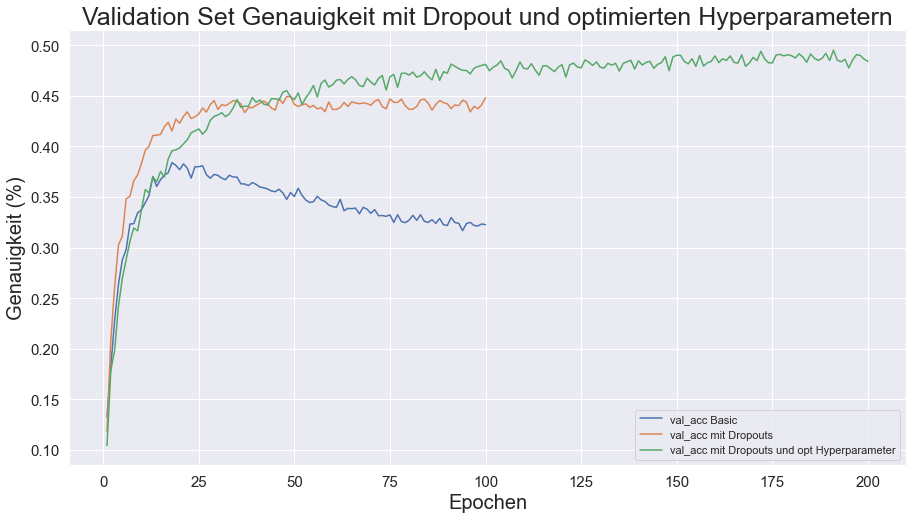

In [40]:
## Grafik, die die Genauigkeit bezgl. der Validierungsdaten über die Epochen, darstellt:

val_accuracy3 = history.history['val_accuracy'] ## Werte aus dem angelegten Dictionary für die Validations Genauigkeit

epochs100 = range(1, len(val_accuracy1) + 1)
epochs200 = range(1, len(val_accuracy3) + 1) ## Anlegen entsprechendes Epochen-Array mit gleicher Form wie val_accuracy

fig, ax = plt.subplots(figsize=(15,8)) # Anlegen der Grafikbox
plt.plot(epochs100,val_accuracy1, label= "val_acc Basic")           # Eintragen der Kurve ( x-, y-Werte)
plt.plot(epochs100,val_accuracy2, label= "val_acc mit Dropouts")           # Eintragen der Kurve ( x-, y-Werte)
plt.plot(epochs200,val_accuracy3, label= "val_acc mit Dropouts und opt Hyperparameter")           # Eintragen der Kurve ( x-, y-Werte)
plt.title("Validation Set Genauigkeit mit Dropout und optimierten Hyperparametern", fontsize=25, )  # Titel der Grafik und Schriftgröße
plt.xlabel("Epochen", fontsize=20)                      # x-Achsentitel und dessen Schriftgröße
plt.ylabel("Genauigkeit (%)", fontsize=20)              # y-Achsentitel und dessen Schriftgröße
plt.xticks(fontsize = 15)                               # x-Achsenskala  Schriftgröße
plt.yticks(fontsize = 15)                               # y-Achsenskala  Schriftgröße
plt.legend(loc='lower right')
plt.show()